Upper Band:  23625
Lower Band:  23625
Average:  23625
Mid Prices:  23625


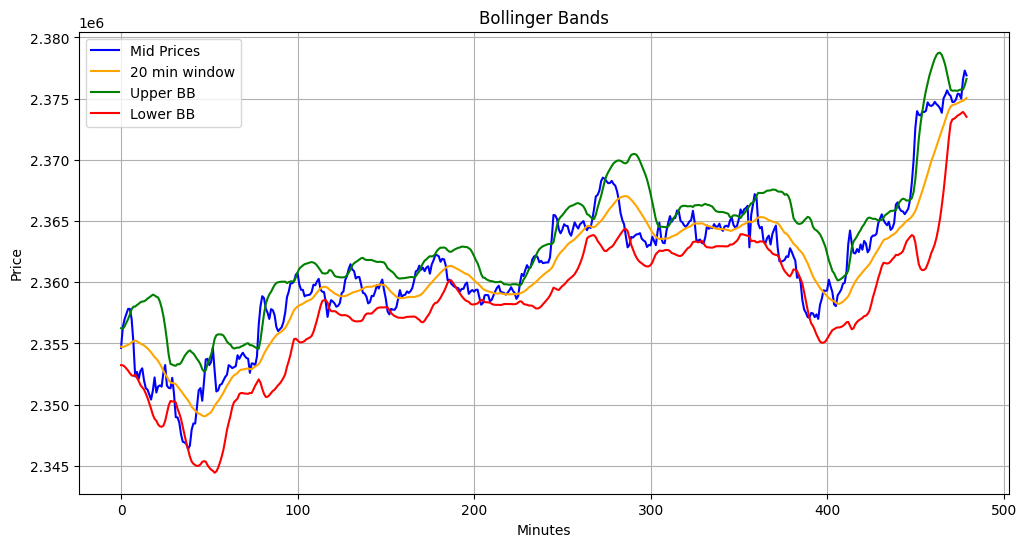

In [ ]:
# the data of the stocks of ohlc of last 3 months is present in the file /home/vishi/bolinger/cumul_ohlc.xls
# the data is in the form of DateTime	open	high	low	close	Mean	SD	BB UP Band	BB MID	BB DOWN Band
# datetime is of the form 20241231~09:16:00


import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xlrd


# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
data = []
for row in range(1, sheet.nrows):
    date = sheet.cell_value(row, 0)
    open_price = sheet.cell_value(row, 1)
    high_price = sheet.cell_value(row, 2)
    low_price = sheet.cell_value(row, 3)
    close_price = sheet.cell_value(row, 4)
    data.append([date, open_price, high_price, low_price, close_price])

high_prices = np.array([row[2] for row in data])
low_prices = np.array([row[3] for row in data])
mid_prices = (high_prices + low_prices)/2

# i want to find the average of the last 20 days and the standard deviation of the last 20 days
def get_avg_std(prices, period):
    avg = np.zeros(len(prices))
    std = np.zeros(len(prices))
    for i in range(period, len(prices)):
        avg[i] = np.mean(prices[i-period:i])
        std[i] = np.std(prices[i-period:i])
    return avg, std
# Calculate the average and standard deviation for the last 20 days
period = 20
avg, std = get_avg_std(mid_prices, period)
# Calculate the upper and lower Bollinger Bands
upper_band = avg + 2 * std
lower_band = avg - 2 * std

print("Upper Band: ", len(upper_band))
print("Lower Band: ", len(lower_band))
print("Average: ", len(avg))
print("Mid Prices: ", len(mid_prices))
mid_prices = mid_prices[period:500]
upper_band = upper_band[period:500]
lower_band = lower_band[period:500]
avg = avg[period:500]
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(mid_prices, label='Mid Prices', color='blue')
plt.plot(avg, label='20 min window', color='orange')
plt.plot(upper_band, label='Upper BB', color='green')
plt.plot(lower_band, label='Lower BB', color='red')

plt.title('Bollinger Bands')
plt.xlabel('Minutes')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()




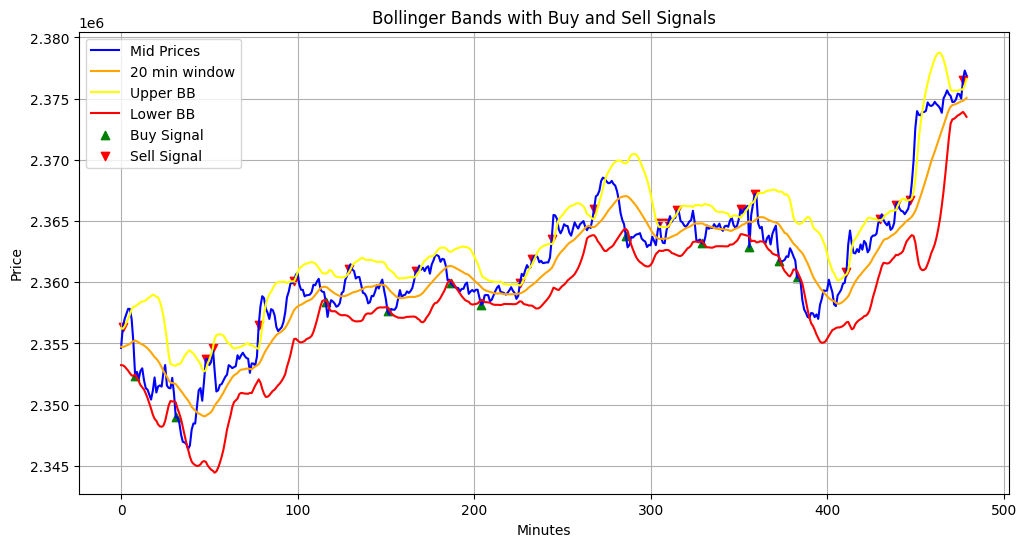

In [ ]:
# from the above data of moving average and standard deviation i want to find the buy and sell signals
# buy signal is when the price crosses the lower band and sell signal is when the price crosses the upper band
# i want to find the buy and sell signals
# but before i buy i want to check if i sold the stock and if i have the stock 
buy_signal = []
sell_signal = []
for i in range(1, len(mid_prices)):
    if mid_prices[i] < lower_band[i] and mid_prices[i-1] > lower_band[i-1]:
        buy_signal.append(i)
    elif mid_prices[i] > upper_band[i] and mid_prices[i-1] < upper_band[i-1]:
        sell_signal.append(i)
# Plot the buy and sell signals
plt.figure(figsize=(12, 6))
plt.plot(mid_prices, label='Mid Prices', color='blue')
plt.plot(avg, label='20 min window', color='orange')
plt.plot(upper_band, label='Upper BB', color='yellow')
plt.plot(lower_band, label='Lower BB', color='red')
plt.scatter(buy_signal, mid_prices[buy_signal], label='Buy Signal', marker='^', color='green')
plt.scatter(sell_signal, mid_prices[sell_signal], label='Sell Signal', marker='v', color='red')
plt.title('Bollinger Bands with Buy and Sell Signals')
plt.xlabel('Minutes')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()